# **Drug categorization using a Random Forest Classifier**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drug200.csv")
df[:3]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


# **EDA**

In [ ]:
df.shape

(200, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


in this dataset,we have 200 rows and 6 columns, where Drug is the output column and the rest of the columns are input columns.input columns are medical patients data and I intend to predict the Types of Drug.Only age and NA_to_k columns are numerical and other  columns are categorical.

# Check Null values

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

No null values present in the dataset so no need to handle


# Check Duplicacy

In [ ]:
df[df.duplicated(keep=False)]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


this dataset has no duplicated rows.So we can inferred that all the rows of this dataset are unique.

# **Analyze the numerical columns(Age & NA_to_K)**

Age column

<Axes: title={'center': 'Age Distribution'}, ylabel='Density'>

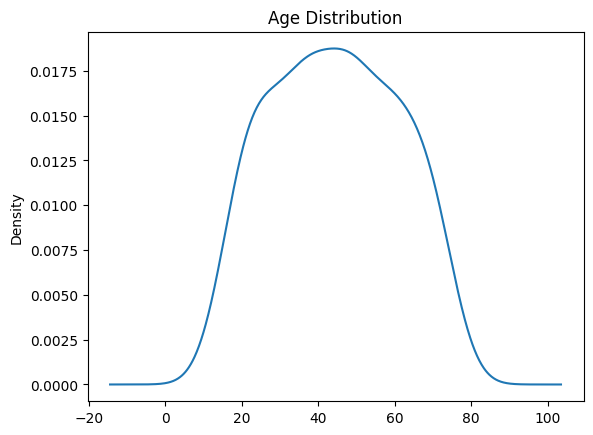

In [ ]:
plt.title("Age Distribution")
df['Age'].plot(kind='kde')


In [ ]:
df['Age'].mean(),df['Age'].median()

(44.315, 45.0)

from this plot we can conclude that age distribition is normal.Mean Median is closer to each other

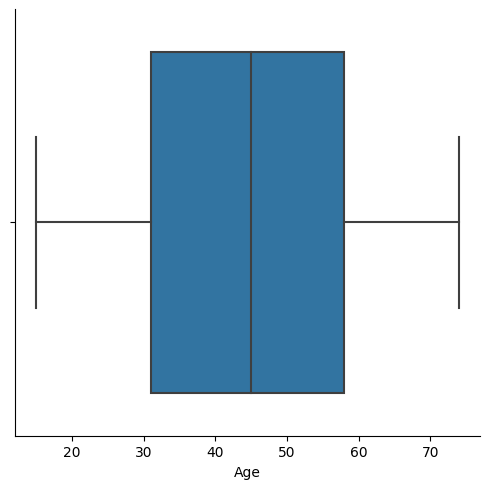

In [ ]:
sns.catplot(x='Age',data=df,kind='box')

From the boxplot of age column, no outlier present.

Na_to_K column

<Axes: title={'center': 'Na_to_K Distribution'}, ylabel='Density'>

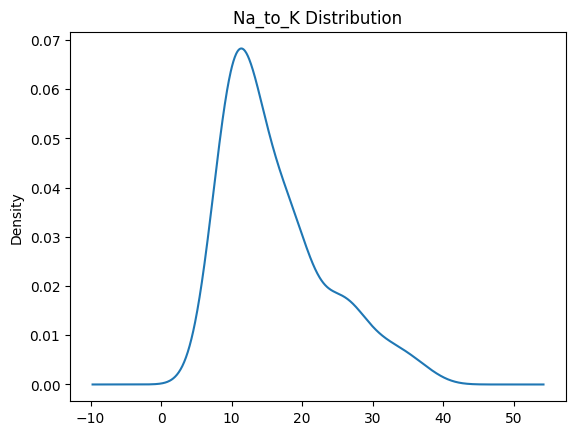

In [ ]:
plt.title("Na_to_K Distribution")
df['Na_to_K'].plot(kind='kde')

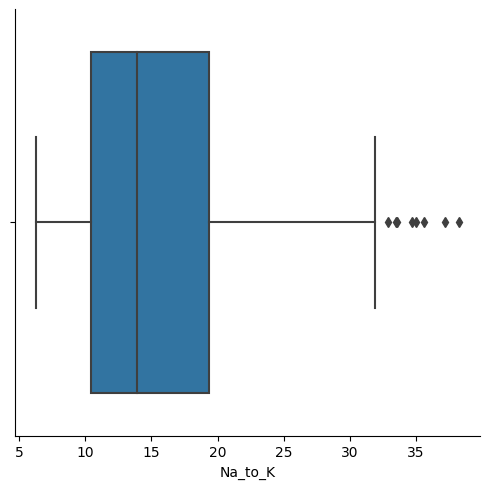

In [ ]:
sns.catplot(x='Na_to_K',data=df,kind='box')

In [ ]:
df['Na_to_K'].mean(),df['Na_to_K'].median()

(16.084485, 13.9365)

from the plot, distribution is right skewed. Moreover, we know that when mean>meadian=right skewed.From boxplot, we found outliers present in this column.Since it is right skewed,so use transformer to convert it normal.

In [ ]:
df = df[df['Na_to_K']>0]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


lambda : -0.35278551267106073


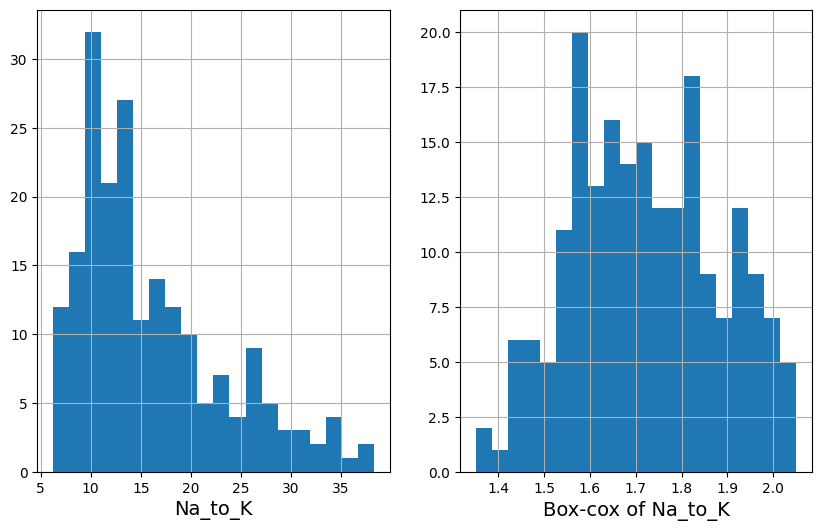

In [ ]:

from scipy.stats import boxcox

y = df['Na_to_K']
y, fitted_lambda= boxcox(y, lmbda=None)

print("lambda :",fitted_lambda)

df['boxcox_Na_to_K'] = y

# plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,6))

ax1.set_xlabel('Na_to_K', fontsize=14)
ax2.set_xlabel('Box-cox of Na_to_K', fontsize=14)

df['Na_to_K'].hist(ax=ax1, bins=20)
df['boxcox_Na_to_K'].hist(ax=ax2, bins=20)

plt.show()

In [ ]:
df['boxcox_Na_to_K'].mean(),df['boxcox_Na_to_K'].median()

(1.723897356640747, 1.7155363252303681)

In [ ]:
df.drop('Na_to_K',axis=1,inplace=True)
df

,Age,Sex,BP,Cholesterol,Drug,boxcox_Na_to_K
0,23,F,HIGH,HIGH,DrugY,1.928526
1,47,M,LOW,HIGH,drugC,1.690615
2,47,M,LOW,HIGH,drugC,1.581538
3,28,F,NORMAL,HIGH,drugX,1.461141
4,61,F,LOW,HIGH,DrugY,1.812982
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,drugC,1.639494
196,16,M,LOW,HIGH,drugC,1.655097
197,52,M,NORMAL,HIGH,drugX,1.571778
198,23,M,NORMAL,NORMAL,drugX,1.717892


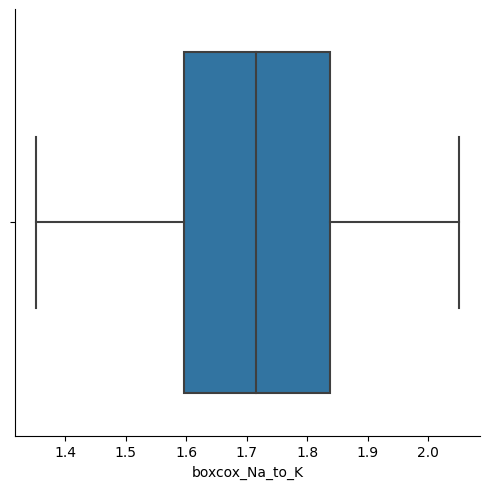

In [ ]:
sns.catplot(x='boxcox_Na_to_K',data=df,kind='box')

After transforming Na_to_K to normal distribution,Now Na_to_K column has no outlier.

# Categorical column Analysis
Here, i am doing 2 analyses-
* Univariate
* Bi-variate

In [ ]:
df[:2]

,Age,Sex,BP,Cholesterol,Drug,boxcox_Na_to_K
0,23,F,HIGH,HIGH,DrugY,1.928526
1,47,M,LOW,HIGH,drugC,1.690615


Sex column

In [ ]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

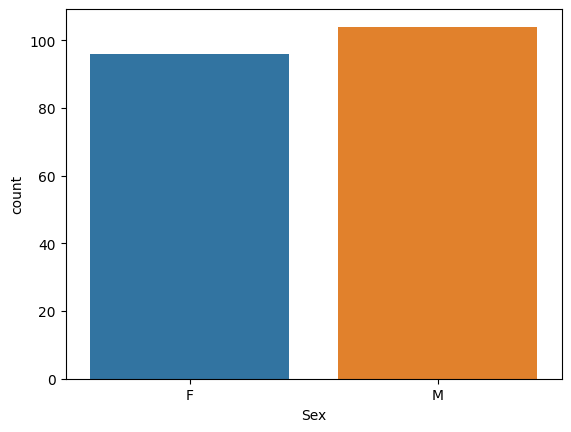

In [ ]:
sns.countplot(x='Sex',data=df)

The numbers of males and females are very close.


BP column

In [ ]:
(df['BP'].value_counts())*100/200

HIGH      38.5
LOW       32.0
NORMAL    29.5
Name: BP, dtype: float64

ONLY 30 percent of the patients have normal BP


<Axes: xlabel='BP', ylabel='count'>

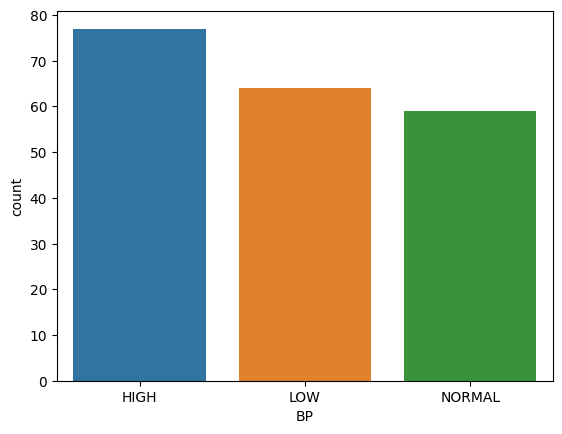

In [ ]:
sns.countplot(x='BP',data=df)

most of the patients have high pressure

In [ ]:
(df['Cholesterol'].value_counts())*100/200

HIGH      51.5
NORMAL    48.5
Name: Cholesterol, dtype: float64

50% of the patients have high cholesterol


<Axes: xlabel='Cholesterol', ylabel='count'>

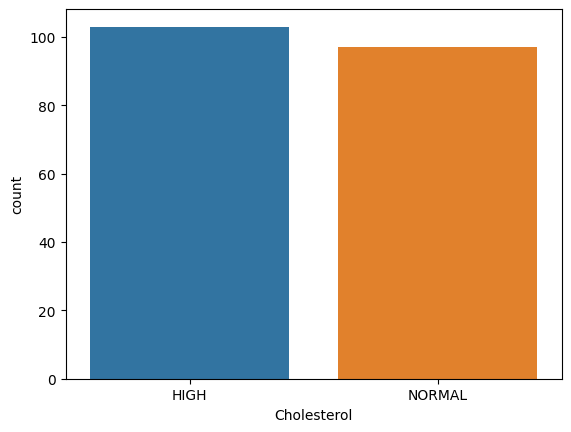

In [ ]:
sns.countplot(x='Cholesterol',data=df)

High-cholesterol patients are more common than normal-cholesterol patients.


# **Analyze the target column**

<Axes: xlabel='Drug', ylabel='count'>

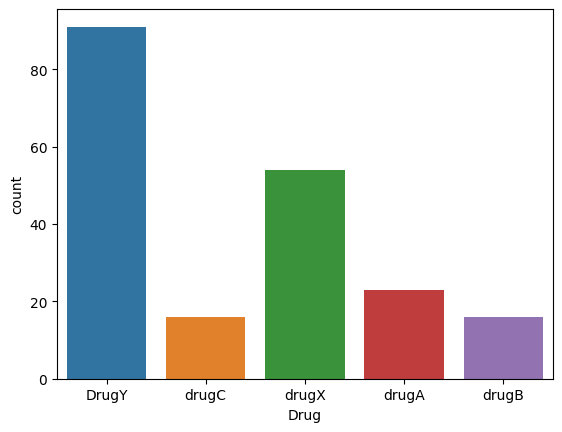

In [ ]:
sns.countplot(x='Drug',data=df)


Drug Y is used more frequently among the patients.

from the barplot, we can conclude that the Drug column is imbalanced. the numbers of y and x are greater than the other types of drug

# **Bivariate analysis**

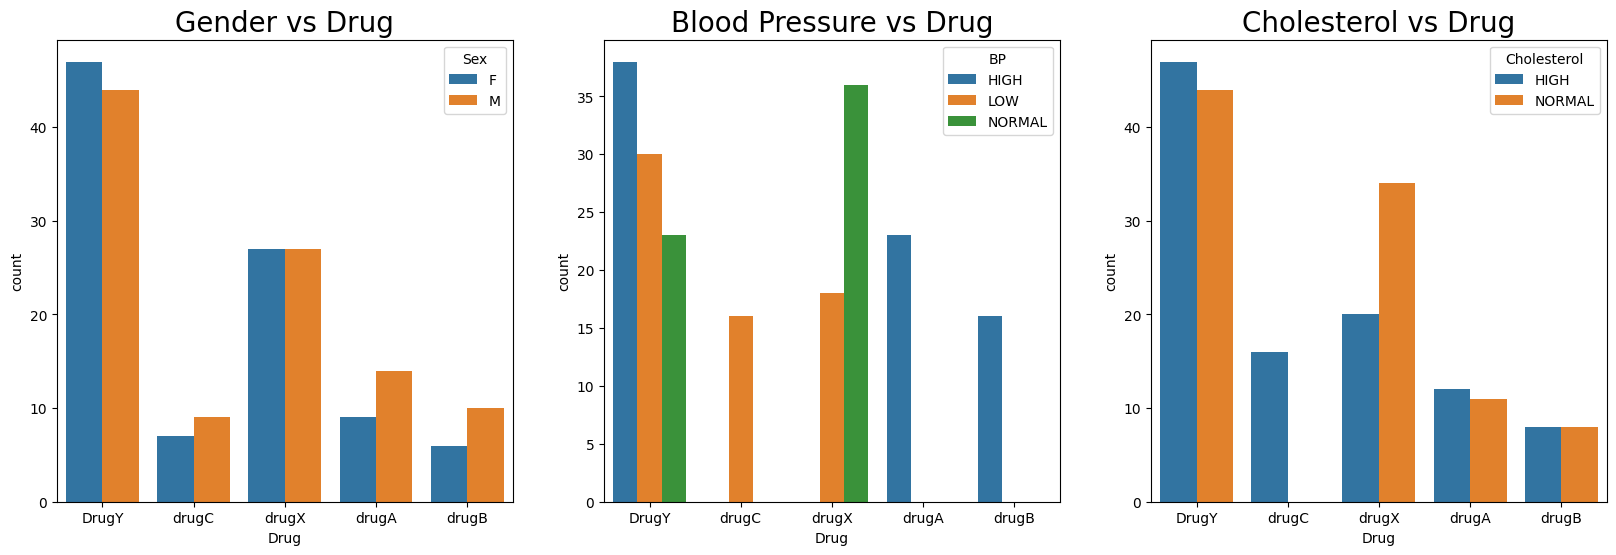

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.countplot(x='Drug',data=df, hue='Sex')
plt.title("Gender vs Drug", size=20)


plt.subplot(1,3,2)
sns.countplot(x='Drug',data=df, hue='BP')
plt.title("Blood Pressure vs Drug", size=20)

plt.subplot(1,3,3)
sns.countplot(x='Drug',data=df, hue='Cholesterol')
plt.title("Cholesterol vs Drug", size=20)

plt.show()

Now i am explaining bivariate analysis in detail<br>
* Gender vs Drug:<br>
Drug A,B & C--> males use more than females</br>
Drug Y--> Females use more than males</br>
Drug X-->equally use<br><br>

* Blood Pressure vs Drug:<br>
Drug A,B =>is used for high BP<BR>
Drug C=  only used for low BP<BR>
Drug Y= used for low and normal BP patient<br>
Drug X=> all the patients<br>
<br>

* Cholesterol vs Drug:<br>
Drug c ==> is only for high cholesterol patients




# **Label Encoder**

encodes the categorical features to numerical features 

In [ ]:
from sklearn.preprocessing import LabelEncoder

def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    print(f'cols for label encoding : {columnsToEncode}')
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df
df= Encoder(df)
df

cols for label encoding : ['Sex', 'BP', 'Cholesterol', 'Drug']


,Age,Sex,BP,Cholesterol,Drug,boxcox_Na_to_K
0,23,0,0,0,0,1.928526
1,47,1,1,0,3,1.690615
2,47,1,1,0,3,1.581538
3,28,0,2,0,4,1.461141
4,61,0,1,0,0,1.812982
...,...,...,...,...,...,...
195,56,0,1,0,3,1.639494
196,16,1,1,0,3,1.655097
197,52,1,2,0,4,1.571778
198,23,1,2,1,4,1.717892


# Now, the categorical columns of the dataset are as follows:
  
For sex column:
* Male= 1
* Female= 0

For BP Column:
* High= 0
* Low= 1
* Normal= 2

For Cholesterol column:
* High= 0
* Normal=1

For Drug column:
* Drug A=1
* Drug B=2
* Drug C=3
* Drug X=4
* Drug Y=0
    

# **define x,y**

In [ ]:
x=df.drop('Drug',axis=1)
y=df['Drug']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# 2. Apply Random Forest

In [ ]:
def evaluation(model):
    from sklearn.metrics  import classification_report,confusion_matrix,f1_score
    model_predictions = model.predict(x_test)
    print("confusion matrix is:\n",confusion_matrix(y_test, model_predictions))
    print("\nClassification report is:\n",classification_report(y_test, model_predictions))
    # calculate probabilities
    pred_prob_svm = model.predict_proba(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
evaluation(rf)

confusion matrix is:
 [[19  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 14]]

Classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# 3. Plot AUC-ROC curve *

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(df.Drug)
df.Drug=label_encoder.transform(df.Drug)
classes=label_encoder.classes_

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


RF=OneVsRestClassifier(RandomForestClassifier(max_features=5))
RF.fit(x_train,y_train)
y_pred =RF.predict(x_test)
pred_prob = RF.predict_proba(x_test)

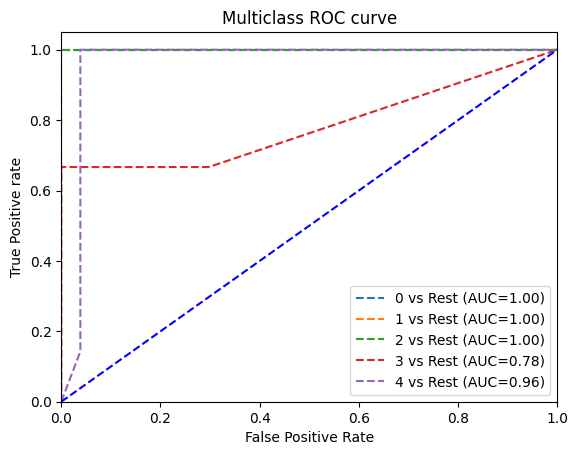

In [ ]:
from sklearn.preprocessing import label_binarize


y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# ROC Curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class =classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
fpr, tpr, thresholds = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()